### **Part One**

I used an older version of the wikipedia page (27 February 2020), because the new table is diferent and is not matching with the assignment table.

In [1]:
import pandas as pd
import numpy as np
import bs4

table = pd.read_html("https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=942851379")[0]

In [2]:
table.rename(columns={"Postcode": "PostalCode", "Neighbourhood": "Neighborhood"}, inplace=True)
table

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
...,...,...,...
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West
285,M8Z,Etobicoke,South of Bloor


Ignore cells with a borough that is Not assigned.

In [3]:
table = table[table.Borough != 'Not assigned']
table

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
...,...,...,...
281,M8Z,Etobicoke,Kingsway Park South West
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West


If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
All Neighborhoods are OK.

In [4]:
table[table.Neighborhood == 'Not assigned']

,PostalCode,Borough,Neighborhood


Neighborhoods with same Postal code are combined into one row, with the neighborhoods separated with a comma.

In [5]:
tableGroups = table.groupby(['PostalCode','Borough'])['Neighborhood'].apply(', '.join).reset_index().sort_values(by=['PostalCode'])
tableGroups

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv..."
101,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ..."


I check that the table size, with removed Postalcode duplicates, match with the new table.

In [6]:
table.drop_duplicates(subset=['PostalCode']).sort_values(by=['PostalCode'])

,PostalCode,Borough,Neighborhood
10,M1B,Scarborough,Rouge
26,M1C,Scarborough,Highland Creek
41,M1E,Scarborough,Guildwood
52,M1G,Scarborough,Woburn
61,M1H,Scarborough,Cedarbrae
...,...,...,...
149,M9N,York,Weston
162,M9P,Etobicoke,Westmount
175,M9R,Etobicoke,Kingsview Village
227,M9V,Etobicoke,Albion Gardens


In [7]:
tableGroups.shape

(103, 3)

**Part Two**

In [8]:
cords = pd.read_csv("Geospatial_Coordinates.csv")

In [9]:
cords.rename(columns={"Postal Code": "PostalCode"}, inplace=True)
cords

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [10]:
tableGroups = tableGroups.merge(cords)

In [11]:
tableGroups

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv...",43.688905,-79.554724
101,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.739416,-79.588437


### **Part Three**

**Clustering the Neighborhoods in Toronto**

In [12]:
from geopy.geocoders import Nominatim

address = 'Toronto'

geolocator = Nominatim(user_agent="toronto_neigh")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [13]:
import folium

map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough, Neighborhood in zip(tableGroups['Latitude'], tableGroups['Longitude'], tableGroups['Borough'], tableGroups['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Radius and Limit for the number of avenues returned by Foursquare API

In [15]:
import requests

LIMIT = 100

radius = 500


**Function to get the top 100 venues within a radius of 500 meters by Neighborhood**

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
toronto_venues = getNearbyVenues(names=tableGroups['Neighborhood'],
                                   latitudes=tableGroups['Latitude'],
                                   longitudes=tableGroups['Longitude']
                                  )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

In [18]:
print(toronto_venues.shape)
toronto_venues.head()

(2201, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Scarborough Historical Society,43.788755,-79.162438,History Museum
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant


Venues in neighborhoods:

In [19]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Agincourt,4,4,4,4,4,4
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",3,3,3,3,3,3
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",8,8,8,8,8,8
"Alderwood, Long Branch",10,10,10,10,10,10
...,...,...,...,...,...,...
Willowdale West,7,7,7,7,7,7
Woburn,4,4,4,4,4,4
"Woodbine Gardens, Parkview Hill",11,11,11,11,11,11


In [20]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 268 uniques categories.


**Neighborhood Analisis**

In [21]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

print(toronto_onehot.shape)
toronto_onehot.head()

(2201, 268)


,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [22]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.02,0.0,0.000000,0.0,0.0,0.0,0.0,0.01
1,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.00
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.00
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.00
4,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Willowdale West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.00
95,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.00
96,"Woodbine Gardens, Parkview Hill",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.00
97,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.090909,0.0,0.0,0.0,0.0,0.00


Top 5 most common venues neighborhood

Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [24]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Restaurant,Coffee Shop,Café,Thai Restaurant,Hotel,Bar,Bakery,Gym,Clothing Store,Office
1,Agincourt,Latin American Restaurant,Skating Rink,Breakfast Spot,Lounge,Dumpling Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Park,Coffee Shop,Playground,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Grocery Store,Fast Food Restaurant,Pharmacy,Pizza Place,Beer Store,Fried Chicken Joint,Sandwich Place,Doner Restaurant,Diner,Discount Store
4,"Alderwood, Long Branch",Pizza Place,Gym,Pharmacy,Sandwich Place,Pub,Athletics & Sports,Dance Studio,Skating Rink,Coffee Shop,Dim Sum Restaurant


<a id='item4'></a>

**K-means Clustering**

In [25]:
from sklearn.cluster import KMeans

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(toronto_grouped.drop('Neighborhood', 1))
    distortions.append(kmeanModel.inertia_)

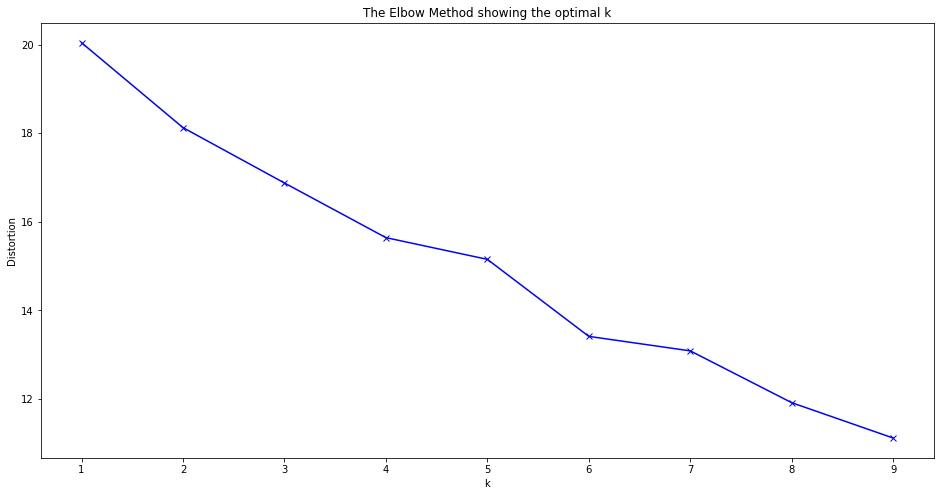

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the graph above using the Elbow Method, there is not a definitive answer for the best number of K and is better to experiment

In [27]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 0, 2, 2, 2, 2, 2, 2, 2])

Clusters of the top 10 venues for each neighborhood

In [28]:
if 'Cluster Labels' in neighborhoods_venues_sorted.columns.to_list():
    neighborhoods_venues_sorted.drop(['Cluster Labels'], 1, inplace=True)

In [29]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Restaurant,Coffee Shop,Café,Thai Restaurant,Hotel,Bar,Bakery,Gym,Clothing Store,Office
1,Agincourt,Latin American Restaurant,Skating Rink,Breakfast Spot,Lounge,Dumpling Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Park,Coffee Shop,Playground,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Grocery Store,Fast Food Restaurant,Pharmacy,Pizza Place,Beer Store,Fried Chicken Joint,Sandwich Place,Doner Restaurant,Diner,Discount Store
4,"Alderwood, Long Branch",Pizza Place,Gym,Pharmacy,Sandwich Place,Pub,Athletics & Sports,Dance Studio,Skating Rink,Coffee Shop,Dim Sum Restaurant


In [30]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = tableGroups

# merge toronto_grouped with tableGroups to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.dropna(inplace=True)

toronto_merged = toronto_merged.astype({'Cluster Labels': 'int32'})

print(toronto_merged.shape)
toronto_merged.head() # check the last columns!

(99, 16)


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,1,Fast Food Restaurant,Dim Sum Restaurant,Falafel Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,2,Bar,History Museum,Women's Store,Dumpling Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,2,Rental Car Location,Intersection,Bank,Medical Center,Mexican Restaurant,Electronics Store,Breakfast Spot,Eastern European Restaurant,Dumpling Restaurant,Drugstore
3,M1G,Scarborough,Woburn,43.770992,-79.216917,2,Coffee Shop,Korean Restaurant,Pharmacy,Women's Store,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,2,Hakka Restaurant,Fried Chicken Joint,Bank,Athletics & Sports,Caribbean Restaurant,Thai Restaurant,Gas Station,Bakery,Lounge,Drugstore


In [31]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

**Clusters Analisis**

#### Cluster 1
**This cluster is primarily about public places, services, some stores and fast food.**

In [32]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Scarborough,0,Park,Coffee Shop,Playground,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
23,North York,0,Park,Bank,Convenience Store,Dumpling Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
25,North York,0,Park,Food & Drink Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Farmers Market
30,North York,0,Park,Airport,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
31,North York,0,Grocery Store,Bank,Shopping Mall,Park,Airport,Farmers Market,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store
40,East York,0,Park,Coffee Shop,Convenience Store,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant
44,Central Toronto,0,Park,Swim School,Bus Line,Lawyer,Concert Hall,Construction & Landscaping,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store
50,Downtown Toronto,0,Park,Trail,Playground,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
64,Central Toronto,0,Park,Trail,Sushi Restaurant,Jewelry Store,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
72,North York,0,Park,Pizza Place,Pub,Japanese Restaurant,Eastern European Restaurant,Electronics Store,Dumpling Restaurant,Drugstore,Donut Shop,Department Store


#### Cluster 2
**Mostly a restaurant area.**

In [33]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Scarborough,1,Fast Food Restaurant,Dim Sum Restaurant,Falafel Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore


#### Cluster 3

**Group activities, drinks, food, general stores and services.**

In [34]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Scarborough,2,Bar,History Museum,Women's Store,Dumpling Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
2,Scarborough,2,Rental Car Location,Intersection,Bank,Medical Center,Mexican Restaurant,Electronics Store,Breakfast Spot,Eastern European Restaurant,Dumpling Restaurant,Drugstore
3,Scarborough,2,Coffee Shop,Korean Restaurant,Pharmacy,Women's Store,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
4,Scarborough,2,Hakka Restaurant,Fried Chicken Joint,Bank,Athletics & Sports,Caribbean Restaurant,Thai Restaurant,Gas Station,Bakery,Lounge,Drugstore
6,Scarborough,2,Department Store,Discount Store,Convenience Store,Coffee Shop,Hobby Shop,Chinese Restaurant,Drugstore,Distribution Center,Dog Run,Doner Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Etobicoke,2,Cosmetics Shop,Coffee Shop,Liquor Store,Beer Store,Convenience Store,Pizza Place,Café,Pet Store,Park,Shopping Plaza
96,North York,2,Empanada Restaurant,Women's Store,Dim Sum Restaurant,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore
99,Etobicoke,2,Pizza Place,Discount Store,Intersection,Coffee Shop,Sandwich Place,Middle Eastern Restaurant,Chinese Restaurant,Women's Store,Dog Run,Diner
101,Etobicoke,2,Grocery Store,Fast Food Restaurant,Pharmacy,Pizza Place,Beer Store,Fried Chicken Joint,Sandwich Place,Doner Restaurant,Diner,Discount Store


#### Cluster 4

**Sports, outdoor activities, women stores, discounts, distribution centers.**

In [35]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,North York,3,Food Truck,Baseball Field,Women's Store,Donut Shop,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore,Farmers Market
91,Etobicoke,3,Construction & Landscaping,Baseball Field,Women's Store,Dumpling Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
97,North York,3,Baseball Field,Women's Store,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Fast Food Restaurant


#### Cluster 5

**Family places, women stores, food.**

In [36]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Scarborough,4,Playground,Women's Store,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant
48,Central Toronto,4,Playground,Summer Camp,Women's Store,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore


#### Most common venues for each Cluster
To better understand every cluster, I grouped them to find the mode 

In [37]:
toronto_merged.groupby(['Cluster Labels']).agg(pd.Series.mode)

,Borough,1st Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Labels,,,,,,,,,
0,North York,Park,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
1,Scarborough,Fast Food Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore
2,Downtown Toronto,Coffee Shop,Coffee Shop,"[Diner, Pizza Place, Sandwich Place]",Restaurant,Distribution Center,"[Dog Run, Doner Restaurant]",Doner Restaurant,Donut Shop
3,North York,"[Baseball Field, Construction & Landscaping, F...","[Discount Store, Donut Shop, Dumpling Restaurant]",Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,"[Eastern European Restaurant, Farmers Market, ..."
4,"[Central Toronto, Scarborough]",Playground,"[Diner, Donut Shop]","[Diner, Discount Store]","[Discount Store, Distribution Center]","[Distribution Center, Dog Run]","[Dog Run, Doner Restaurant]","[Doner Restaurant, Donut Shop]","[Drugstore, Dumpling Restaurant]"


#### Comparing the clusters

In [38]:
toronto_merged.groupby(['Cluster Labels','Borough']).first()

PostalCode  \
Cluster Labels Borough                       
0              Central Toronto         M4N   
               Downtown Toronto        M4W   
               East York               M4J   
               Etobicoke               M9R   
               North York              M2P   
               Scarborough             M1V   
               York                    M6E   
1              Scarborough             M1B   
2              Central Toronto         M4P   
               Downtown Toronto        M4X   
               East Toronto            M4E   
               East York               M4B   
               Etobicoke               M8V   
               Mississauga             M7R   
               North York              M2H   
               Scarborough             M1C   
               West Toronto            M6H   
               York                    M6C   
3              Etobicoke               M8Y   
               North York              M3M   
4              Central Toronto         M4T   
               Scarborough             M1J   

                                                                      Neighborhood  \
Cluster Labels Borough                                                               
0              Central Toronto                                       Lawrence Park   
               Downtown Toronto                                           Rosedale   
               East York                                              East Toronto   
               Etobicoke         Kingsview Village, Martin Grove Gardens, Richv...   
               North York                                          York Mills West   
               Scarborough       Agincourt North, L'Amoreaux East, Milliken, St...   
               York                                            Caledonia-Fairbanks   
1              Scarborough                                          Rouge, Malvern   
2              Central Toronto                                    Davisville North   
               Downtown Toronto                        Cabbagetown, St. James Town   
               East Toronto                                            The Beaches   
               East York                           Woodbine Gardens, Parkview Hill   
               Etobicoke              Humber Bay Shores, Mimico South, New Toronto   
               Mississauga                   Canada Post Gateway Processing Centre   
               North York                                        Hillcrest Village   
               Scarborough                  Highland Creek, Rouge Hill, Port Union   
               West Toronto                           Dovercourt Village, Dufferin   
               York                                             Humewood-Cedarvale   
3              Etobicoke         Humber Bay, King's Mill Park, Kingsway Park So...   
               North York                                        Downsview Central   
4              Central Toronto                         Moore Park, Summerhill East   
               Scarborough                                     Scarborough Village   

                                  Latitude  Longitude  \
Cluster Labels Borough                                  
0              Central Toronto   43.728020 -79.388790   
               Downtown Toronto  43.679563 -79.377529   
               East York         43.685347 -79.338106   
               Etobicoke         43.688905 -79.554724   
               North York        43.752758 -79.400049   
               Scarborough       43.815252 -79.284577   
               York              43.689026 -79.453512   
1              Scarborough       43.806686 -79.194353   
2              Central Toronto   43.712751 -79.390197   
               Downtown Toronto  43.667967 -79.367675   
               East Toronto      43.676357 -79.293031   
               East York         43.706397 -79.309937   
               Etobicoke         43.605647 -79.501321   
       